# Einstein Summation Convetion

## Let's start with a simple example.

In [2]:
import numpy as np
A = np.random.rand(3, 5)
B = np.random.rand(5, 2)
M = np.empty((3, 2))

print(f"A: {A.shape} \n {A}")
print(f"B: {B.shape} \n {B}")

A: (3, 5) 
 [[0.53679696 0.57217541 0.12668853 0.661491   0.92468409]
 [0.37717597 0.05289419 0.51851273 0.53082531 0.57857197]
 [0.73229076 0.27660653 0.34151057 0.16975022 0.15893069]]
B: (5, 2) 
 [[0.91308887 0.87404927]
 [0.8034345  0.33206508]
 [0.06876545 0.01479789]
 [0.54207317 0.36347482]
 [0.75977469 0.73628687]]


In [3]:
for i in range(3):
    for j in range(2):
        total = 0
        for k in range(5):
            total += A[i, k]*B[k,j]
        M[i, j] = total
print(f"M: {M.shape} \n {M}")

M: (3, 2) 
 [[2.01968868 1.58232926]
 [1.14987847 0.97384418]
 [1.12713446 0.91568172]]


Simplify by using `np.einsum`

In [4]:
'''
np.einsum("ik,kj->ij", A, B)
Where i, j is free index 
k is summation index
'''
M = np.einsum("ik,kj->ij", A, B)
print(f"M einsum {M.shape} \n {M}")

M einsum (3, 2) 
 [[2.01968868 1.58232926]
 [1.14987847 0.97384418]
 [1.12713446 0.91568172]]


# Rules
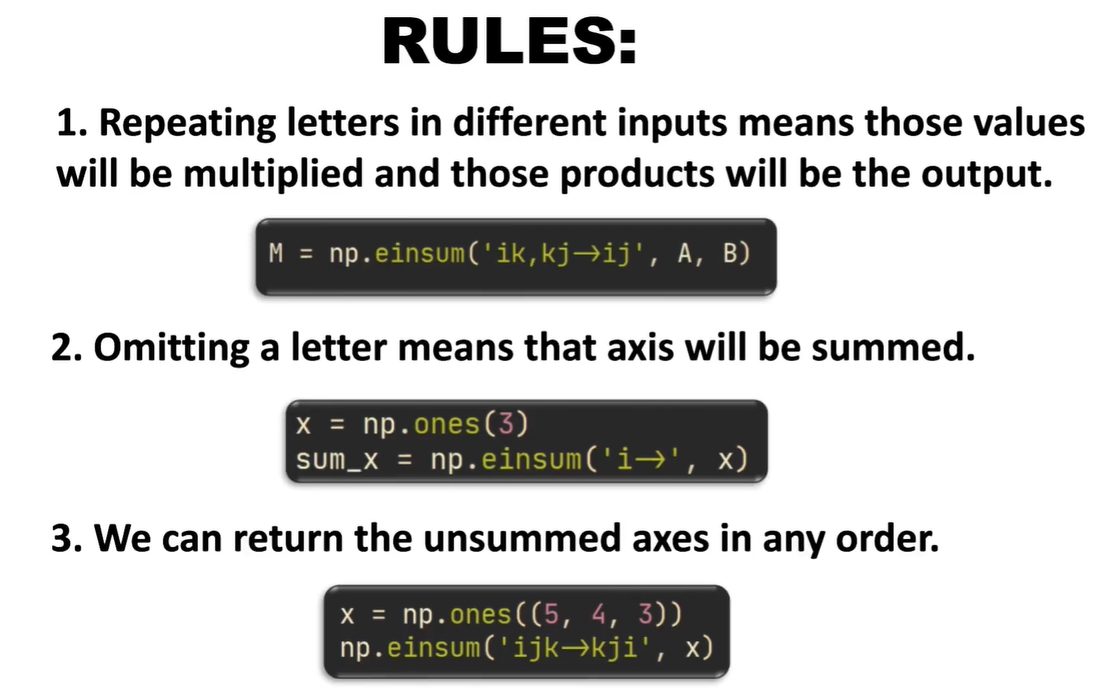

# Using Einstein Summation Convention

In [5]:
x = np.random.rand(2, 3)
print(f"x: {x.shape} \n {x}")

x: (2, 3) 
 [[0.1330688  0.80310836 0.13370532]
 [0.54993433 0.45014561 0.59823115]]


### Permutation on Tensor

In [6]:
np.einsum("ij->ji", x)

array([[0.1330688 , 0.54993433],
       [0.80310836, 0.45014561],
       [0.13370532, 0.59823115]])

### Summation

In [8]:
np.einsum("ij->", x)

2.6681935659464324

### Column and Row Sumation

In [10]:
print(f'Column summation {np.einsum("ij->j", x)}')
print(f'Row summation {np.einsum("ij->i", x)}')

Column summation [0.68300313 1.25325397 0.73193647]
Row summation [1.06988247 1.59831109]


### Matrix-Vector Multiplication


In [12]:
v = np.random.rand(1, 3)
print(f"v: {v.shape} \n {v}")
print(f'Matrix-vecot multiplication \n {np.einsum("ij,kj->ik",x, v)}')

v: (1, 3) 
 [[0.57292825 0.411056   0.82117208]]
Matrix-vecot multiplication 
 [[0.51615645]
 [0.99135869]]


### Matrix-Matrix Multiplication

In [14]:
print(f"{x.shape}")
print(f'Matrix-Matrix multiplication \n {np.einsum("ij,kj->ik",x,x)}')

(2, 3)
Matrix-Matrix multiplication 
 [[0.68056746 0.51468149]
 [0.51468149 0.86293935]]


### Dot product first row with first row of matrix

In [15]:
print("Dot product first row with first row of matrix")
print(f'{np.einsum("i,i->",x[0],x[0])}')

Dot product first row with first row of matrix
0.6805674556067903


### Dot product with matrix

In [17]:
print(f'Dot product with matrix {np.einsum("ij,ij->",x,x)}')

Dot product with matrix 1.5435068043504345


### Hadamard product (element wise multiplication)

In [22]:
print(f'{x}')
print(f'Element wise multiplication \n {np.einsum("ij,ij->ij", x, x)}')

[[0.1330688  0.80310836 0.13370532]
 [0.54993433 0.45014561 0.59823115]]
Element wise multiplication 
 [[0.0177073  0.64498304 0.01787711]
 [0.30242777 0.20263107 0.35788051]]


### Outer product

In [25]:
a = np.random.rand((3))
b = np.random.rand((5))
print(f'a: {a.shape} \n {a}')
print(f'b: {b.shape} \n {b}')
print(f'Outer product \n {np.einsum("i,j->ij", a, b)}')

a: (3,) 
 [0.52813934 0.6987009  0.86312952]
b: (5,) 
 [0.14766237 0.137766   0.07400886 0.33177648 0.27208226]
Outer product 
 [[0.07798631 0.07275965 0.03908699 0.17522421 0.14369734]
 [0.10317183 0.09625723 0.05171005 0.23181253 0.19010412]
 [0.12745175 0.11890991 0.06387923 0.28636607 0.23484223]]


### Batch matrix multiplication

In [31]:
a = np.random.rand(3, 2, 5)
b = np.random.rand(3, 5, 3)
print(f'a: {a.shape}')
print(f'b: {b.shape}')
# in this case we want to multiply a last dimension with 
# b second dimension
rs = np.einsum("ijk,ikl->ijl", a, b)
print(f'Batch matrix mulplication \n {rs.shape} \n {rs}')

a: (3, 2, 5)
b: (3, 5, 3)
Batch matrix mulplication 
 (3, 2, 3) 
 [[[0.71953715 1.50106538 0.84560163]
  [0.22119043 0.46764835 0.29049975]]

 [[2.33227623 2.17471112 1.62099894]
  [1.37967099 0.8610343  1.10644109]]

 [[1.89142462 1.16521512 1.65918965]
  [1.27047103 0.75458066 1.13028939]]]


### Matrix diagonal

In [33]:
y = np.random.rand(3, 3)
print(f'y: {y.shape} \n {y}')
print(f'Matrix diagonal \n {np.einsum("ii->i", y)}')

y: (3, 3) 
 [[0.16223448 0.11166048 0.72414431]
 [0.56054295 0.09359966 0.83384791]
 [0.43519095 0.04010659 0.53640362]]
Matrix diagonal 
 [0.16223448 0.09359966 0.53640362]


### Matrix trace

In [38]:
print(f'y: {y.shape} \n {y}')
print(f'Matrix trace \n {np.einsum("ii->", y)}')
np.trace(y)

y: (3, 3) 
 [[0.16223448 0.11166048 0.72414431]
 [0.56054295 0.09359966 0.83384791]
 [0.43519095 0.04010659 0.53640362]]
Matrix trace 
 0.7922377631985896


0.7922377631985896